In [3]:
using AbstractGPs
using Distributions
using Flux
using KernelFunctions
using LinearAlgebra
using Plots
using CSV ,DataFrames

begin
    data=CSV.read("w2021-1.csv",DataFrame,header=6)
    data0=CSV.read("w2022-1.csv",DataFrame,header=6)
    data1=CSV.read("w2020.csv",DataFrame,header=6)
    dataset2021=Array(transpose(Matrix(data[1:365,[5]])))
    dataset2022=Array(transpose(Matrix(data0[1:365,[5]])))
    dataset2020=Array(transpose(Matrix(data1[1:365,[4]])))
    x0=Array(transpose(dataset2020[1:364]))
    y0=Array(transpose(dataset2020[2:365]))
    x1=Array(transpose(dataset2021[1:364]))
    y1=Array(transpose(dataset2021[2:365]))
    x2=Array(transpose(dataset2022[1:364]))
    y2=Array(transpose(dataset2022[2:365]))
end

1×364 Matrix{Float64}:
 7.9  10.5  12.4  8.7  2.6  8.4  9.5  …  11.4  12.3  11.9  13.7  11.8  10.5

In [127]:
neuralnet = Chain(Dense(1, 20), Dense(20, 30), Dense(30, 10))

Chain(
  Dense(1 => 20),                       # 40 parameters
  Dense(20 => 30),                      # 630 parameters
  Dense(30 => 10),                      # 310 parameters
)                   # Total: 6 arrays, 980 parameters, 4.203 KiB.

In [128]:
k = SqExponentialKernel() ∘ FunctionTransform(neuralnet)

Squared Exponential Kernel (metric = Distances.Euclidean(0.0))
	- Function Transform: Chain(Dense(1 => 20), Dense(20 => 30), Dense(30 => 10))

In [129]:
gpprior = GP(k)  # GP Prior


GP{AbstractGPs.ZeroMean{Float64}, TransformedKernel{SqExponentialKernel{Distances.Euclidean}, FunctionTransform{Chain{Tuple{Dense{typeof(identity), Matrix{Float32}, Vector{Float32}}, Dense{typeof(identity), Matrix{Float32}, Vector{Float32}}, Dense{typeof(identity), Matrix{Float32}, Vector{Float32}}}}}}}(AbstractGPs.ZeroMean{Float64}(), Squared Exponential Kernel (metric = Distances.Euclidean(0.0))
	- Function Transform: Chain(Dense(1 => 20), Dense(20 => 30), Dense(30 => 10)))

In [130]:
noise_std = 0.01

0.01

In [131]:
x_train=collect(eachrow(vec(x1)))

364-element Vector{SubArray{Float64, 1, Matrix{Float64}, Tuple{Int64, Base.Slice{Base.OneTo{Int64}}}, true}}:
 [10.5]
 [10.8]
 [8.4]
 [11.4]
 [10.0]
 [6.8]
 [12.7]
 [6.5]
 [8.4]
 [8.1]
 [6.5]
 [5.7]
 [12.5]
 ⋮
 [10.0]
 [11.9]
 [15.2]
 [13.5]
 [13.2]
 [13.2]
 [14.1]
 [7.6]
 [8.1]
 [9.5]
 [8.9]
 [14.5]

In [132]:
y_train = vec(y1).+rand(364)*noise_std

364-element Vector{Float64}:
 10.809528236666367
  8.404522171393541
 11.40541615277238
 10.002526251774647
  6.801515344948486
 12.7076826154015
  6.50354916993925
  8.409815259357092
  8.107103835950133
  6.502656788905394
  5.707543374798238
 12.50118564452813
 14.508591756778868
  ⋮
 11.906792047179312
 15.209347286744483
 13.502760186482831
 13.205331296564985
 13.200119887453452
 14.100926861974797
  7.6088904655039205
  8.101763871266806
  9.504074564646858
  8.909360147731546
 14.509440412980727
  6.003393845280792

In [133]:
y_test=vec(y2).+rand(364)*noise_std

364-element Vector{Float64}:
  7.900111529992347
 10.509522706324331
 12.408104331189064
  8.708731626546822
  2.604829156482407
  8.407350840714125
  9.50153206606558
 13.402509232461226
  9.608193432874456
  7.206203385844366
  8.600151932806451
 11.503410666277105
  8.604915798850191
  ⋮
 10.901046356964974
  9.902391804468378
 10.70550645854653
  8.40368051973239
 11.50405143810286
 13.106498722054805
 11.407932166983326
 12.30694547595231
 11.906755613191185
 13.702006744298941
 11.803907612251857
 10.503079914589794

In [134]:
fx = AbstractGPs.FiniteGP(gpprior, x_train, 0.01^2) 
fp = posterior(fx, y_train) ;

In [135]:
loss(y) = -logpdf(fx, y)

loss (generic function with 1 method)

In [136]:
ps = Flux.params(k)

Params([Float32[-0.45538726; 0.0037669379; … ; -0.1341358; 0.049109038;;], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[0.14347522 -0.12514597 … 0.19557342 -0.06123165; 0.16448998 0.092274405 … 0.31924722 0.26546007; … ; 0.2904609 0.09807008 … -0.21174264 -0.0046142554; 0.28378946 -0.14297192 … 0.072143316 -0.063044064], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[0.16129272 0.34937018 … -0.2842144 0.3676551; -0.014440961 0.38058764 … -0.18004753 -0.017488476; … ; 0.25579756 0.02464425 … -0.3420675 0.22026366; -0.31988862 0.19864763 … 0.0024566362 0.11058575], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

In [137]:
nmax = 1000
opt = Flux.ADAM(0.1)

Adam(0.1, (0.9, 0.999), 1.0e-8, IdDict{Any, Any}())

In [138]:
for i in 1:nmax
    grads = gradient(ps) do
        loss(y_train)
    end
    Flux.Optimise.update!(opt, ps, grads)
end


In [140]:
pred = marginals(posterior(fx, vec(y1))(ColVecs(x2)))

364-element Vector{Normal{Float64}}:
 Normal{Float64}(μ=1.9579377731030255e-16, σ=1.0)
 Normal{Float64}(μ=10.798920107989206, σ=0.009999500037481101)
 Normal{Float64}(μ=10.798920107989206, σ=0.009999500037481101)
 Normal{Float64}(μ=14.998500149985007, σ=0.009999500037481101)
 Normal{Float64}(μ=7.592003609796522e-17, σ=1.0)
 Normal{Float64}(μ=0.0, σ=1.0)
 Normal{Float64}(μ=9.749512524376769, σ=0.007070891041793161)
 Normal{Float64}(μ=9.69967667744504, σ=0.005773406469252712)
 Normal{Float64}(μ=1.0548889225015533e-16, σ=1.0)
 Normal{Float64}(μ=12.499375031247757, σ=0.007070891041793161)
 Normal{Float64}(μ=7.234822398329666e-273, σ=1.0)
 Normal{Float64}(μ=9.499050094990505, σ=0.009999500037481101)
 Normal{Float64}(μ=7.991582747154231e-17, σ=1.0)
 ⋮
 Normal{Float64}(μ=1.2667032241182082e-16, σ=1.0)
 Normal{Float64}(μ=1.6356684948982412e-16, σ=1.0)
 Normal{Float64}(μ=7.472503457272655e-17, σ=1.0)
 Normal{Float64}(μ=15.998400159984008, σ=0.009999500037481101)
 Normal{Float64}(μ=9.74951252437

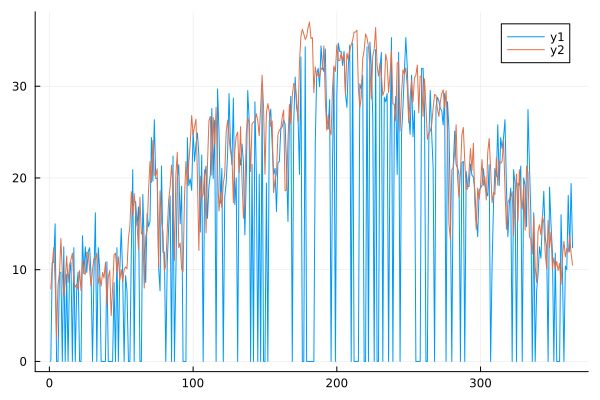

In [142]:
plot(mean.(pred))
plot!(y2')

In [143]:
low=quantile.(pred, [0.025])

364-element Vector{Float64}:
 -1.959963984540059
 10.779321448052336
 10.779321448052336
 14.978901490048138
 -1.9599639845400592
 -1.9599639845400592
  9.735653832596247
  9.688361008697195
 -1.9599639845400592
 12.485516339467235
 -1.9599639845400592
  9.479451435053635
 -1.9599639845400592
  ⋮
 -1.959963984540059
 -1.959963984540059
 -1.9599639845400592
 15.978801500047139
  9.735653832596247
 -1.9599639845400592
 10.379361444052735
  9.979401440053133
 18.0785914711996
 11.950995614620112
 19.378461534043737
 12.388271011699254

In [144]:
up=quantile.(pred, [0.975])

364-element Vector{Float64}:
  1.9599639845400585
 10.818518767926076
 10.818518767926076
 15.018098809921877
  1.9599639845400583
  1.9599639845400583
  9.76337121615729
  9.710992346192887
  1.9599639845400583
 12.513233723028279
  1.9599639845400583
  9.518648754927375
  1.9599639845400583
  ⋮
  1.9599639845400585
  1.9599639845400585
  1.9599639845400583
 16.01799881992088
  9.76337121615729
  1.9599639845400583
 10.418558763926475
 10.018598759926872
 18.11778888233659
 11.968525992169091
 19.41765885391748
 12.410902349194947

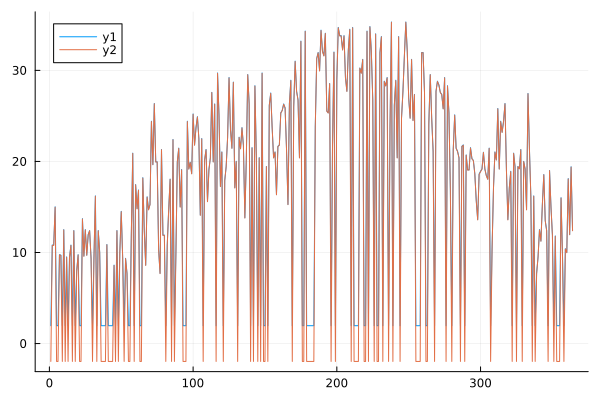

In [82]:
plot(up)
plot!(low)

In [145]:
neuralnet = Chain(Dense(1, 20), Dense(20, 30), Dense(30, 10))

Chain(
  Dense(1 => 20),                       # 40 parameters
  Dense(20 => 30),                      # 630 parameters
  Dense(30 => 10),                      # 310 parameters
)                   # Total: 6 arrays, 980 parameters, 4.203 KiB.

In [146]:
parameters_initial, reconstruct = Flux.destructure(neuralnet)

(Float32[0.098173216, 0.3457804, -0.3962254, 0.3904886, 0.054714747, -0.1040419, 0.31153622, -0.4015704, -0.09193464, -0.24620616  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Restructure(Chain, ..., 980))

In [147]:
nparameters=length(parameters_initial)

980

In [166]:
using Turing
using ReverseDiff

In [157]:
kk(n)= SqExponentialKernel() ∘ FunctionTransform(n)

kk (generic function with 1 method)

In [176]:
GP(kk(neuralnet))(ColVecs(x1),1e-3)

AbstractGPs.FiniteGP{GP{AbstractGPs.ZeroMean{Float64}, TransformedKernel{SqExponentialKernel{Distances.Euclidean}, FunctionTransform{Chain{Tuple{Dense{typeof(identity), Matrix{Float32}, Vector{Float32}}, Dense{typeof(identity), Matrix{Float32}, Vector{Float32}}, Dense{typeof(identity), Matrix{Float32}, Vector{Float32}}}}}}}, ColVecs{Float64, Matrix{Float64}, SubArray{Float64, 1, Matrix{Float64}, Tuple{Base.Slice{Base.OneTo{Int64}}, Int64}, true}}, Diagonal{Float64, FillArrays.Fill{Float64, 1, Tuple{Base.OneTo{Int64}}}}}(
f: GP{AbstractGPs.ZeroMean{Float64}, TransformedKernel{SqExponentialKernel{Distances.Euclidean}, FunctionTransform{Chain{Tuple{Dense{typeof(identity), Matrix{Float32}, Vector{Float32}}, Dense{typeof(identity), Matrix{Float32}, Vector{Float32}}, Dense{typeof(identity), Matrix{Float32}, Vector{Float32}}}}}}}(AbstractGPs.ZeroMean{Float64}(), Squared Exponential Kernel (metric = Distances.Euclidean(0.0))
	- Function Transform: Chain(Dense(1 => 20), Dense(20 => 30), Dense(3

In [177]:
n1=reconstruct(rand(980))

Chain(
  Dense(1 => 20),                       # 40 parameters
  Dense(20 => 30),                      # 630 parameters
  Dense(30 => 10),                      # 310 parameters
)                   # Total: 6 arrays, 980 parameters, 4.203 KiB.

In [181]:
mean(GP(kk(n1))(ColVecs(x1),1e-3))

364-element Zeros{Float64}

In [182]:
cov(GP(kk(n1))(ColVecs(x1),1e-3))

364×364 Matrix{Float64}:
 1.001  0.0    0.0    0.0    0.0    …  0.0    0.0    0.0    0.0    0.0
 0.0    1.001  0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
 0.0    0.0    1.001  0.0    0.0       0.0    0.0    0.0    0.0    0.0
 0.0    0.0    0.0    1.001  0.0       0.0    0.0    0.0    0.0    0.0
 0.0    0.0    0.0    0.0    1.001     0.0    0.0    0.0    0.0    0.0
 0.0    0.0    0.0    0.0    0.0    …  0.0    0.0    0.0    0.0    0.0
 0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
 0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
 0.0    0.0    1.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
 0.0    0.0    0.0    0.0    0.0       0.0    1.0    0.0    0.0    0.0
 0.0    0.0    0.0    0.0    0.0    …  0.0    0.0    0.0    0.0    0.0
 0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
 0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
 ⋮                                  ⋱         ⋮     

In [173]:
@model function GPDKL(x,y, K,nparameters,reconstruct;alpha=0.09)
    N, D = size(x)
    @assert K <= D
    noise = 1e-3
    # Priors
    parameters ~ MvNormal(zeros(nparameters), I / alpha)
    σ ~ LogNormal(0.0, 1.0)
    nn = reconstruct(parameters)
    gp=GP(kk(nn))
    kxx=gp(ColVecs(x),noise)
    
    y ~ MvNormal(mean(kxx), (cov(kxx)+1e-6 * I)+σ*I)

    return nothing
end;

In [ ]:
gp= GPDKL(x1,Array(y1'),1,nparameters,reconstruct)
chain= sample(gp, HMC(0.01, 100), 500)